In [61]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
# from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
# from sklearn.preprocessing import normalize
import scipy.io
import scipy.optimize as op

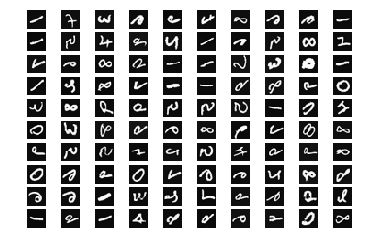

In [62]:
mat = scipy.io.loadmat('./ex4/ex4data1.mat')
mat2 = scipy.io.loadmat('./ex4/ex4weights.mat')
X = mat.get('X')
y = mat.get('y')

input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
output_layer_size = 10

layers = [input_layer_size, hidden_layer_size, output_layer_size]

m = len(y)

Theta1 = mat2.get('Theta1') # 25 x 401
Theta2 = mat2.get('Theta2') # 10 x 26

thetas = np.concatenate((Theta1.flatten(), Theta2.flatten()))

images_count = len(X)
display_count = 10
img_size = int(math.sqrt(len(X[0])))

random_images = X[np.random.choice(len(X), display_count ** 2)]

for i in range(display_count):
    for j in range(display_count):
        img_num = i * 10 + j
        img = random_images[img_num].reshape(img_size, img_size)
        plt.subplot(display_count, display_count, img_num + 1)
        plt.imshow(img, cmap='Greys_r')
        plt.axis('off')
plt.show()

ones = np.ones((images_count, 1))
X = np.column_stack((ones, X))

# y = y.ravel()
# y[y == 10] = 0
y_new = np.zeros((m, output_layer_size))
y_new[np.arange(0, m),y.ravel() - 1] = 1
y = y_new

In [63]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def compute_cost1(theta1, theta2, X, y, lambdaa=0, reg=True):
    A1 = sigmoid(X.dot(theta1.T))
    
    ones = np.ones((len(A1), 1))
    A1 = np.column_stack((ones, A1))
    
    A2 = sigmoid(A1.dot(theta2.T))
    h = A2
    
    m = len(y)
    cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
#     if reg:
    theta1_reg = theta1[1:]
    theta2_reg = theta2[1:]

    cost_reg = lambdaa / 2 / m * (np.sum(theta1_reg ** 2) + np.sum(theta2_reg ** 2))

#     cost += cost_reg
    return cost + cost_reg

def sigmoidGradient(z):
    return z * (1 - z)

cost = compute_cost1(Theta1, Theta2, X, y)
print('Cost at parameters: {:.6f} (should be about 0.287629)'.format(cost));

cost = compute_cost1(Theta1, Theta2, X, y, lambdaa=1, reg=True)
print('Cost at parameters: {:.6f} (should be about 0.383770)'.format(cost));

g = sigmoidGradient(sigmoid(np.array([-1, -0.5, 0, 0.5, 1])));
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]: \n {}'.format(g));

Cost at parameters: 0.287629 (should be about 0.287629)
Cost at parameters: 0.379046 (should be about 0.383770)
Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]: 
 [0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [64]:
def compute_cost(thetas, layers, X, y, lambdaa=0):
    input_layer_size, hidden_layer_size, output_layer_size = layers
    
    theta1_end_index = (input_layer_size + 1) * hidden_layer_size
    theta1 = thetas[:theta1_end_index].reshape(hidden_layer_size, input_layer_size + 1)
    theta2 = thetas[theta1_end_index:].reshape(output_layer_size, hidden_layer_size + 1)
    
    A1 = sigmoid(X.dot(theta1.T))
    
    ones = np.ones((len(A1), 1))
    A1 = np.column_stack((ones, A1))
    
    A2 = sigmoid(A1.dot(theta2.T))
    h = A2
    
    m = len(y)
    cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
#     theta1_reg = theta1[1:]
#     theta2_reg = theta2[1:]

#     cost_reg = lambdaa / 2 / m * (np.sum(theta1_reg ** 2) + np.sum(theta2_reg ** 2))

#     cost += cost_reg
    return cost

cost = compute_cost(thetas, layers, X, y)
print('Cost at parameters: {:.6f} (should be about 0.287629)'.format(cost));

cost = compute_cost(thetas, layers, X, y, lambdaa=1)
print('Cost at parameters: {:.6f} (should be about 0.383770)'.format(cost));

g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]));
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]: \n {}'.format(g));

Cost at parameters: 0.287629 (should be about 0.287629)
Cost at parameters: 0.287629 (should be about 0.383770)
Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]: 
 [-2.   -0.75  0.    0.25  0.  ]


In [76]:
# def backpropagation_step1(theta1, theta2, X, y, lambdaa=0):
#     def sigmoidGradientInternal(z):
#         return z * (1 - z)
    
#     A1 = X
#     A2 = sigmoid(A1.dot(theta1.T))
    
#     ones = np.ones((len(A2), 1))
#     A2 = np.column_stack((ones, A2))
    
#     A3 = sigmoid(A2.dot(theta2.T))
#     h = A3
    
#     b3 = A3 - y # 5000 x 10
#     b2 = b3.dot(theta2) * sigmoidGradientInternal(A2) # 5000 x 26
    
#     delta1 = b2[:,1:].T.dot(A1) # 401 x 25
#     delta2 = b3.T.dot(A2) # 26 x 10
    
#     theta1_reg = theta1.copy()
#     theta1_reg[:,0] = 0
#     theta2_reg = theta2.copy()
#     theta2_reg[:,0] = 0
        
#     theta1_grad = delta1 / m + lambdaa * theta1_reg
#     theta2_grad = delta2 / m + lambdaa * theta2_reg
    
#     return (theta1_grad, theta2_grad)

def backpropagation_step(thetas, layers, X, y, lambdaa=0):
    input_layer_size, hidden_layer_size, output_layer_size = layers
    
    theta1_end_index = (input_layer_size + 1) * hidden_layer_size
    theta1 = thetas[:theta1_end_index].reshape(hidden_layer_size, input_layer_size + 1)
    theta2 = thetas[theta1_end_index:].reshape(output_layer_size, hidden_layer_size + 1)
    
    A1 = X
    A2 = sigmoid(A1.dot(theta1.T))
    
    ones = np.ones((len(A2), 1))
    A2 = np.column_stack((ones, A2))
    
    A3 = sigmoid(A2.dot(theta2.T))
    h = A3
    
    b3 = A3 - y # 5000 x 10
    b2 = b3.dot(theta2) * sigmoidGradient(A2) # 5000 x 26
    
    delta1 = b2[:,1:].T.dot(A1) # 401 x 25
    delta2 = b3.T.dot(A2) # 26 x 10
    
#     theta1_reg = theta1.copy()
#     theta1_reg[:,0] = 0
#     theta2_reg = theta2.copy()
#     theta2_reg[:,0] = 0
        
#     theta1_grad = delta1 / m + lambdaa * theta1_reg
#     theta2_grad = delta2 / m + lambdaa * theta2_reg

#     theta1_reg = theta1.copy()
#     theta1_reg[:,0] = 0
#     theta2_reg = theta2.copy()
#     theta2_reg[:,0] = 0
        
    theta1_grad = delta1 / m #+ lambdaa * theta1_reg
    theta2_grad = delta2 / m #+ lambdaa * theta2_reg

    return np.concatenate((theta1_grad.flatten(), theta2_grad.flatten()))

# Theta1 = 0
# Theta2 = 0
thetas_test = np.concatenate((Theta1.flatten(), Theta2.flatten()))
thetas_test = np.concatenate((np.ones(Theta1.flatten().shape), np.ones(Theta2.flatten().shape)))
grads = backpropagation_step(thetas_test, layers, X, y)
print(sum(grads))

234.000002338532


In [78]:
print(thetas)
thetas = np.concatenate((np.ones(Theta1.flatten().shape), np.ones(Theta2.flatten().shape)))
result = op.fmin_cg(f = compute_cost,
                    x0 = thetas,
                    args = (layers, X, y),
                    fprime = backpropagation_step)

def predict(thetas, layers):
    input_layer_size, hidden_layer_size, output_layer_size = layers
    
    theta1_end_index = (input_layer_size + 1) * hidden_layer_size
    theta1 = thetas[:theta1_end_index].reshape(hidden_layer_size, input_layer_size + 1)
    theta2 = thetas[theta1_end_index:].reshape(output_layer_size, hidden_layer_size + 1)
    
    A1 = X
    A2 = sigmoid(A1.dot(theta1.T))
    
    ones = np.ones((len(A2), 1))
    A2 = np.column_stack((ones, A2))
    
    return sigmoid(A2.dot(theta2.T))

predictions = predict(result, layers)
print('predictions: ', predictions)
predictions = np.argmax(predictions, axis=1) + 1

num_correct = 0
for prediction, actual in zip(predictions, mat.get('y')):
    num_correct += 1 if prediction == actual else 0
    
print('correct %: ', 1.0 * num_correct / len(y) * 100)

[1. 1. 1. ... 1. 1. 1.]
Optimization terminated successfully.
         Current function value: 3.250830
         Iterations: 1
         Function evaluations: 16
         Gradient evaluations: 14
predictions:  [[0.09999934 0.09999934 0.09999934 ... 0.09999934 0.09999934 0.09999934]
 [0.09999934 0.09999934 0.09999934 ... 0.09999934 0.09999934 0.09999934]
 [0.09999934 0.09999934 0.09999934 ... 0.09999934 0.09999934 0.09999934]
 ...
 [0.09999934 0.09999934 0.09999934 ... 0.09999934 0.09999934 0.09999934]
 [0.09999934 0.09999934 0.09999934 ... 0.09999934 0.09999934 0.09999934]
 [0.09999934 0.09999934 0.09999934 ... 0.09999934 0.09999934 0.09999934]]
correct %:  10.0
